#### 2일차 과제 : load_breast_cancer, 2진분류
1. 상관관계
2. 정규화
3. train / test set split
4. train / test 에 대한 acc, f1, confusion
5. x_test [0] 에 대한 암 여부 판단

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

<Axes: >

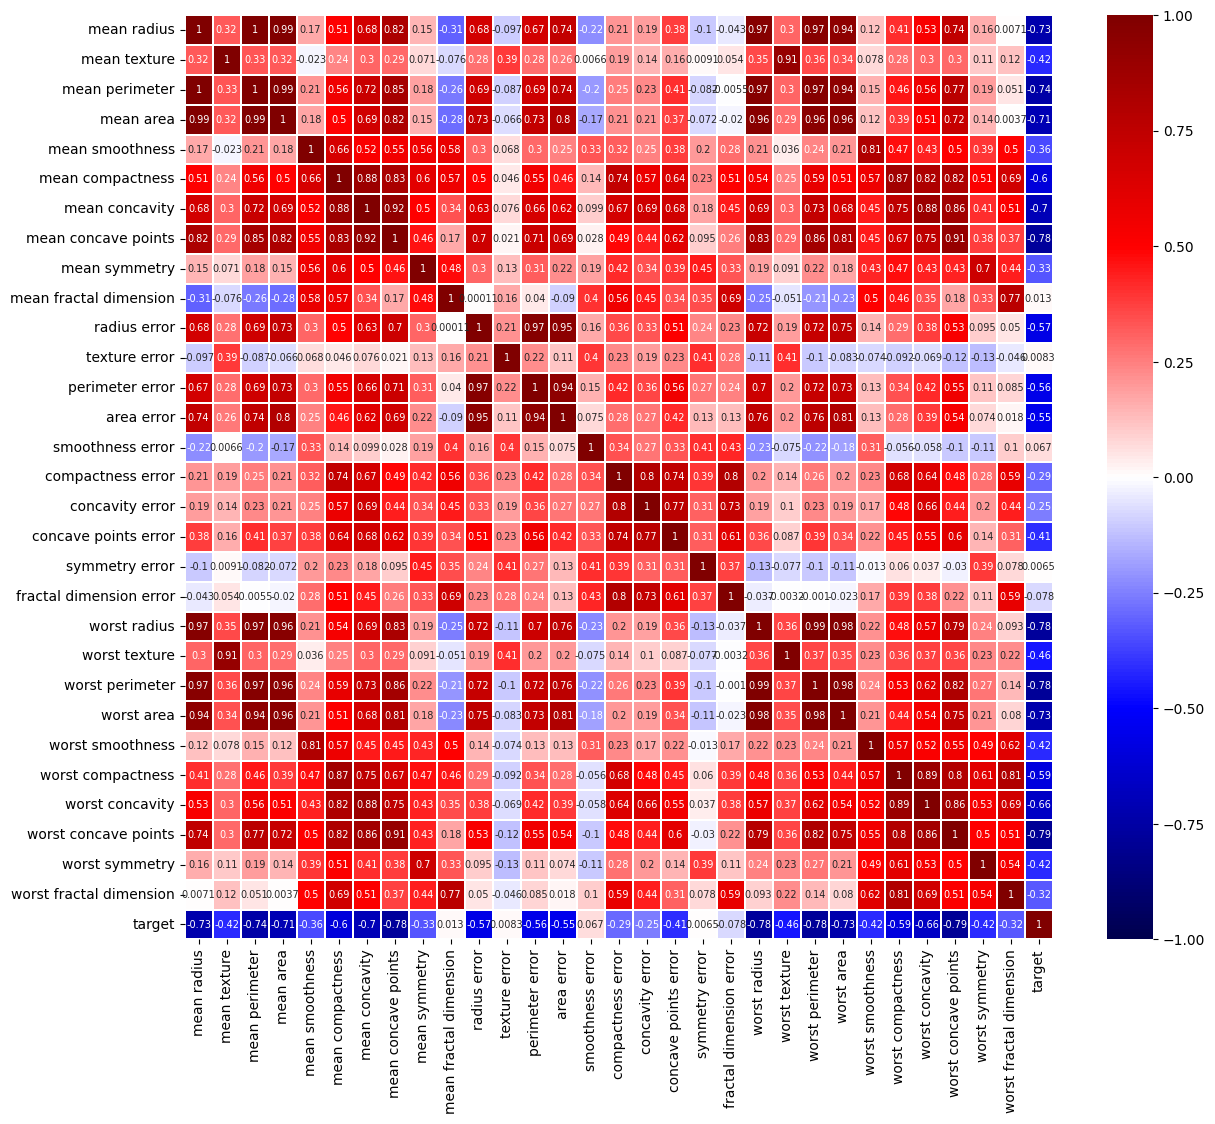

In [2]:
cancer = load_breast_cancer(as_frame=True)
df = cancer['frame']
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]]
# 
#1. 상관관계
plt.figure(figsize=(14,12))
sb.heatmap(df.corr(), annot = True, annot_kws={'size':7}, vmin = -1, vmax = 1, linewidths= 0.2, cmap='seismic')

In [3]:
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


Epoch 1/300


c:\Python3109\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7185 - loss: 0.5887 - val_acc: 0.9125 - val_loss: 0.4022
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8715 - loss: 0.3749 - val_acc: 0.9625 - val_loss: 0.2909
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9100 - loss: 0.2987 - val_acc: 0.9375 - val_loss: 0.2421
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9104 - loss: 0.2628 - val_acc: 0.9750 - val_loss: 0.1949
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9125 - loss: 0.2221 - val_acc: 0.9625 - val_loss: 0.1830
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9503 - loss: 0.1933 - val_acc: 1.0000 - val_loss: 0.1648
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9275 - loss: 0.2132 - val_acc: 0.9500 - val_loss: 0.1588
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9256 - loss: 0.1862 - val_acc: 1.0000 - val_loss: 0.1367
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9579 - loss: 0.

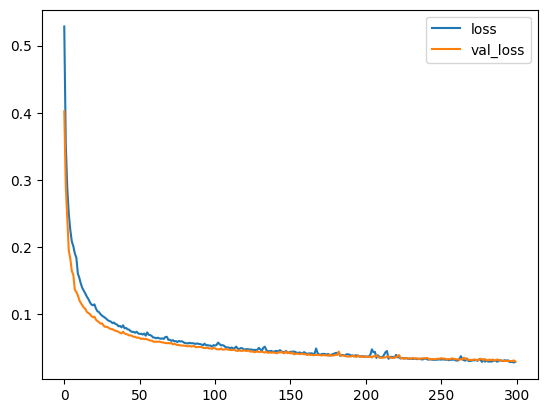

In [ ]:
### 2. 정규화
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)
#
(r,c) = x_dataN.shape
num_feat = c

### 3. train / test split, randomly
#   0.7 /   0.3 fraction 으로 split
# Note that x is normalized by min_max.
x_train, x_test, y_train, y_test = train_test_split(x_dataN,
                    y_data, test_size=0.3, stratify = y_data)

### 4. training model
(r,c) = x_dataN.shape
num_feat = c

dense = Dense(units = 1, input_dim=num_feat, activation='sigmoid')
model = Sequential([dense])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), 
              metrics = ['acc'])
h = model.fit(x_train, y_train, validation_split=0.2, epochs = 300)

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

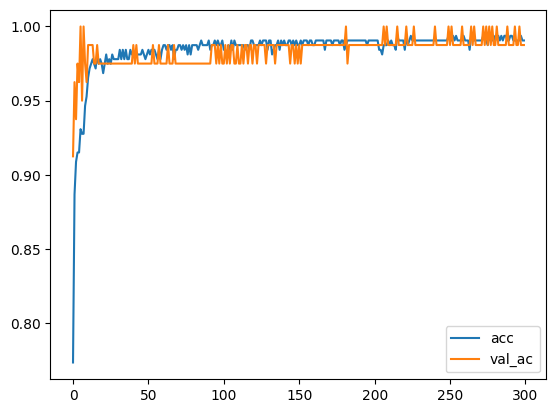

In [4]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc','val_ac'])
plt.show()

In [ ]:
### 4. train / test 에 대한 acc, f1, confusion
predTrain = (model.predict(x_train) > 0.5) + 0
print('============================')
print('Train set :\n')
print(f'acc: {accuracy_score(y_train, predTrain)}, 
      f1: {f1_score(y_train, predTrain)}')
print('confusion mat: \n', confusion_matrix(y_train, predTrain))
print('============================')


predTest = (model.predict(x_test) > 0.5) + 0
print('============================')
print('Test set :\n')
print(f'acc: {accuracy_score(y_test, predTest)},
       f1: {f1_score(y_test, predTest)}')
print('confusion mat: \n', confusion_matrix(y_test, predTest))
print('============================')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train set :

acc: 0.9899497487437185, f1: 0.9920634920634921
confusion mat: 
 [[144   4]
 [  0 250]]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test set :

acc: 0.9532163742690059, f1: 0.9626168224299065
confusion mat: 
 [[ 60   4]
 [  4 103]]


In [6]:
### 5. x_test[0] 에 대한 예측
print(x_test[0]) 
yt = model.predict(x_test[0].reshape(1,-1))
yt = (yt > 0.5) + 0
print('x_test[0] 에 대한 예측:', yt[0])

[0.20961711 0.17619209 0.20551448 0.10965005 0.34269206 0.19069382
 0.14482193 0.11734592 0.0540404  0.25716091 0.080717   0.16526697
 0.0539509  0.02982454 0.19182785 0.26307568 0.14936869 0.32430385
 0.19372995 0.13436425 0.15795091 0.15138593 0.14298521 0.0693079
 0.2702899  0.12972611 0.13162939 0.21635739 0.04849202 0.12613144]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
x_test[0] 에 대한 예측: [1]
